In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

: 

In [21]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('data.csv', parse_dates=['Date'])

# Sort by date to ensure chronological order
df = df.sort_values('Date').reset_index(drop=True)

# Ensure 'Up Trend' and 'Down Trend' columns are strings
df['Up Trend'] = df['Up Trend'].astype(str)
df['Down Trend'] = df['Down Trend'].astype(str)

window_size = 15
windows = []
labels = []

for i in range(len(df) - window_size + 1):
    window = df.iloc[i:i + window_size]
    windows.append(window[['Open', 'High', 'Low', 'Close']].values)

    up_trend = (window['Up Trend'] == 'UP').all()
    down_trend = (window['Down Trend'] == 'DOWN').all()
    # print(window['Up Trend'].notna())

    if up_trend and not down_trend:
        labels.append('UP')
    elif down_trend and not up_trend:
        labels.append('DOWN')
    else:
        labels.append('MIXED')

In [ ]:
import numpy as np

augmented_windows = []
augmented_labels = []

for i in range(len(windows)):
    original_window = windows[i]
    label = labels[i]
    
    # Flip prices vertically (around a baseline)
    flipped_window = original_window.copy()
    # Flip OHLC values: we reverse price movement
    # Mirror around the first close price (or another reference)
    base_price = original_window[0][-1]  # first close
    flipped_window = base_price - (original_window - base_price)

    # Reverse the label
    if label == 'UP':
        new_label = 'DOWN'
    elif label == 'DOWN':
        new_label = 'UP'
    else:
        new_label = 'MIXED'

    # Save augmented data
    augmented_windows.append(flipped_window)
    augmented_labels.append(new_label)


In [22]:
windows

[array([[142.5, 143.5, 139. , 139.5],
        [139. , 140. , 137. , 138. ],
        [138. , 138. , 135. , 135.5],
        [134.5, 135. , 130.5, 133. ],
        [132. , 135. , 132. , 134. ],
        [133. , 134.5, 130.5, 133. ],
        [133. , 134. , 131.5, 133. ],
        [133.5, 135.5, 133. , 133.5],
        [130.5, 132. , 130.5, 131.5],
        [137.5, 138. , 135.5, 137. ],
        [135. , 138. , 134.5, 137. ],
        [137.5, 138. , 136. , 138. ],
        [137.5, 137.5, 133.5, 134.5],
        [134. , 136.5, 134. , 135. ],
        [136.5, 138.5, 136. , 138.5]]),
 array([[139. , 140. , 137. , 138. ],
        [138. , 138. , 135. , 135.5],
        [134.5, 135. , 130.5, 133. ],
        [132. , 135. , 132. , 134. ],
        [133. , 134.5, 130.5, 133. ],
        [133. , 134. , 131.5, 133. ],
        [133.5, 135.5, 133. , 133.5],
        [130.5, 132. , 130.5, 131.5],
        [137.5, 138. , 135.5, 137. ],
        [135. , 138. , 134.5, 137. ],
        [137.5, 138. , 136. , 138. ],
        [1

In [23]:
labels

['MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'UP',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'DOWN',
 'DOWN',
 'DOWN',
 'DOWN',
 'DOWN',
 'DOWN',
 'DOWN',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED',
 'MIXED']

In [28]:
from sklearn.preprocessing import LabelEncoder

X = np.array(windows)

label_encoder = LabelEncoder()
# Fit and transform the labels into numeric values
y = label_encoder.fit_transform(labels)

# Reshape to (n, 50, 40)
X_train_selected = X.reshape(-1, 15, 4, 1)
X_train_selected.shape

(84, 15, 4, 1)

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape per sample: (50, 40, 1)
input_shape = (15, 4, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(10, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3)),

    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')  # <-- 3-class output
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # <-- updated loss for 3 classes
    metrics=['accuracy']
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 14, 3, 10)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 1, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 933 (3.64 KB)

 Trainable params: 933 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train the model
history = model.fit(X_train_selected, y,
                    epochs=60,
                    batch_size=128,
                    )

Epoch 1/60


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.3452 - loss: 37.2923
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3690 - loss: 47.6660
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4405 - loss: 31.7232
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4405 - loss: 35.3043
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3452 - loss: 37.9247
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3452 - loss: 33.5496
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3571 - loss: 35.3150
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4762 - loss: 19.0236
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3452 - loss: 34.5850
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4048 - loss: 28.5953
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3333 - loss: 29.3256
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4405 - loss: 25.9559

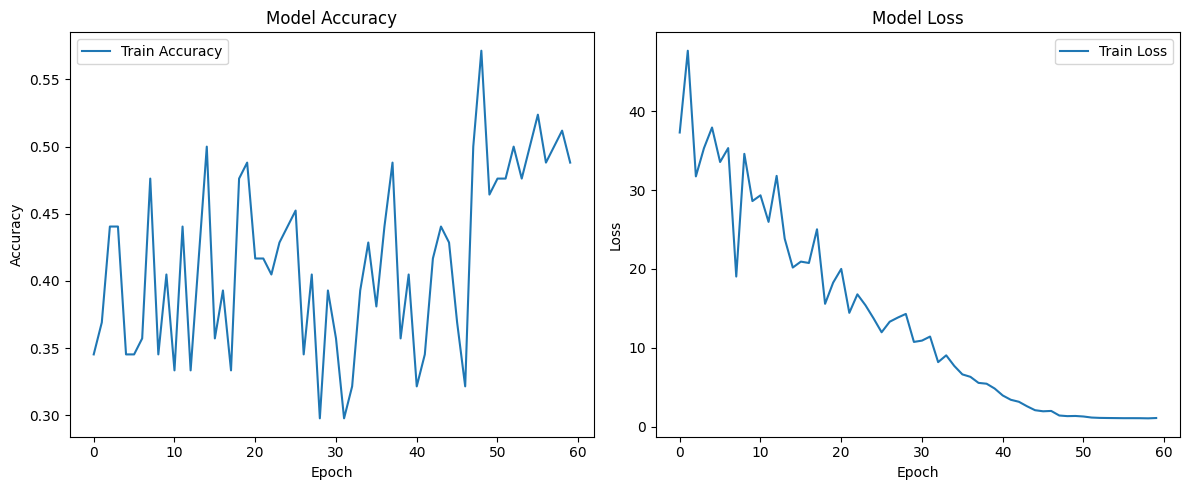

In [75]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Step 5: Evaluate on validation setd
print("Evaluating model...")
# y_pred_val = model.predict(X_val_selected)

y_pred_prob = model.predict(X_val_selected)
y_pred_val = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_val, y_pred_val))
# auc_score = roc_auc_score(y_val, model.predict_proba(X_val_selected)[:, 1])
# print(f"AUC-ROC Score: {auc_score:.4f}")

Evaluating model...
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2113
           1       0.69      0.57      0.62       152

    accuracy                           0.95      2265
   macro avg       0.83      0.77      0.80      2265
weighted avg       0.95      0.95      0.95      2265

